# Phase2

##Classification Data



In [2]:
! pip install -U imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.4
    Uninstalling imbalanced-learn-0.12.4:
      Successfully uninstalled imbalanced-learn-0.12.4


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  LabelEncoder
from sklearn.linear_model import LogisticRegression, ElasticNet, ElasticNetCV , LogisticRegressionCV, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score  , mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, StackingRegressor, StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
plt.style.use("fivethirtyeight")


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
df = pd.read_csv('/content/creditcard.csv')

In [ ]:
# file_path = 'https://drive.google.com/file/d/1YGoxcKs-1M_02jkaOoN38Zn-BAoqdVB6/view?usp=drive_link'
# df = pd.read_csv(file_path)

In [8]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

## Solving UnBalance

In [10]:
x = df.drop("Class", axis=1)
y = df['Class']

In [11]:
y.value_counts()

,count
Class,
0,283253
1,473


In [12]:
x.value_counts()

Time      V1         V2         V3         V4         V5         V6         V7         V8         V9         V10        V11        V12        V13        V14        V15        V16        V17        V18        V19        V20        V21        V22        V23        V24        V25        V26        V27        V28        Amount
0.0       -1.359807  -0.072781   2.536347   1.378155  -0.338321   0.462388   0.239599   0.098698   0.363787   0.090794  -0.551600  -0.617801  -0.991390  -0.311169   1.468177  -0.470401   0.207971   0.025791   0.403993   0.251412  -0.018307   0.277838  -0.110474   0.066928   0.128539  -0.189115   0.133558  -0.021053  149.62    1
128577.0   2.064946  -1.220602  -2.720084  -1.846070   1.820880   3.273309  -0.862146   0.728871  -0.499542   0.737309  -0.005048  -0.349295  -0.090283   0.068393  -0.079605   0.529603   0.366053  -2.033829   0.750950   0.157391   0.006482  -0.181554   0.209057   0.709531  -0.061154  -0.314023  -0.024853  -0.055415  79.00     1
128579.0  -0.091496   0.647387   0.446831  -0.559030  -0.445276   0.021171  -0.699942   0.782127   0.308637  -1.050558   0.883989   0.410977  -0.019394  -1.035580   0.389207   1.787433  -0.255804   1.702687  -0.831639  -0.211408   0.391241   0.980314   0.220292   0.680759  -1.367822   0.262090   0.024109   0.082050  10.00     1
          -0.629317   0.772905   1.377229  -0.962690   0.980905  -0.455294   1.222018  -0.237498  -0.644468  -0.544858   0.560780   0.312265  -0.394019   0.193742  -0.858526   0.074907  -0.754035  -0.106795   0.548587   0.023790  -0.304267  -0.781862  -0.391788  -0.338316   0.480825   0.292419  -0.217947  -0.194154  0.99      1
128578.0   0.362504   0.656017  -1.046132  -1.186442  -0.078498  -1.494867   0.284255  -0.006974  -1.482036  -0.397661  -0.401688  -0.075234   1.384230  -1.323528  -0.593644   0.955698   1.461877  -1.291927   0.812255   0.023393   0.105256   0.260553   0.106619  -0.018704  -0.484520  -0.333273  -0.082633  -0.049849  15.00     1
                                                                                                                                                                                                                                                                                                                                       ..
65094.0    1.168794  -0.269935   1.334978   0.144444  -1.251397  -0.495038  -0.736117  -0.027802   0.637994  -0.238964  -0.134125   0.849149   1.600931  -0.519208   1.496813   0.820601  -0.684146   0.115938  -0.428426   0.101694   0.228951   0.713351  -0.044773   0.518847   0.106453   1.105699  -0.023822   0.030258  34.75     1
           1.191764   0.123671   0.125734   0.466992  -0.117594  -0.130153  -0.215300   0.198796   0.047186  -0.107961   1.271984   0.002590  -1.509036   0.253695   0.854684   0.557546  -0.000651   0.061624  -0.132067  -0.198542  -0.249178  -0.801929   0.125896  -0.394587   0.099828   0.132666  -0.021910   0.010309  1.98      1
65095.0    1.266860   0.294385   0.258873   1.002113  -0.173674  -0.623939   0.073522  -0.135046   0.147616   0.008860  -0.877608  -0.146270  -0.257655   0.377893   1.099482   0.336448  -0.634254   0.042649  -0.182526  -0.147662  -0.090846  -0.250633  -0.077220  -0.143977   0.595150  -0.406232   0.019255   0.019747  4.60      1
65096.0   -0.580685  -0.268608   1.385982  -0.809117  -0.942468  -0.033445   1.316975  -0.297999   0.980510  -1.273376  -0.956825  -0.295081  -0.585017  -0.099254   1.552689  -1.045095   0.084549   0.627545   1.939006   0.660933   0.140083   0.371076   0.193089  -0.127966   0.252982  -0.508207  -0.070610  -0.089716  251.59    1
172792.0  -0.533413  -0.189733   0.703337  -0.506271  -0.012546  -0.649617   1.577006  -0.414650   0.486180  -0.915427  -1.040458  -0.031513  -0.188093  -0.084316   0.041333  -0.302620  -0.660377   0.167430  -0.256117   0.382948   0.261057   0.643078   0.376777   0.008797  -0.473649  -0.818267  -0.002415   0.013649  217.00    1
Name: count, Length: 283726, dtype: int64

<Axes: ylabel='count'>

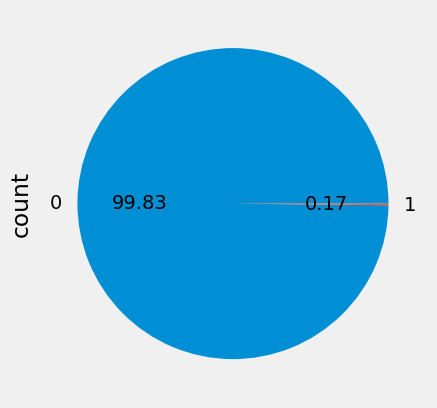

In [13]:
from enum import auto
y.value_counts().plot.pie(autopct = '%.2f')

### Using Random Under Sampler

In [14]:
y.dropna(inplace=True)

In [15]:
from collections import Counter
print(Counter(y))  # Check the distribution of the classes

Counter({0: 283253, 1: 473})


In [ ]:
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler
# rus = RandomOverSampler(sampling_strategy='auto')
# x_res, y_res = rus.fit_resample(x, y)

In [ ]:
# ax = y_res.value_counts().plot.pie(autopct = '%.2f')
# _ = ax.set_title('under-sampled data')

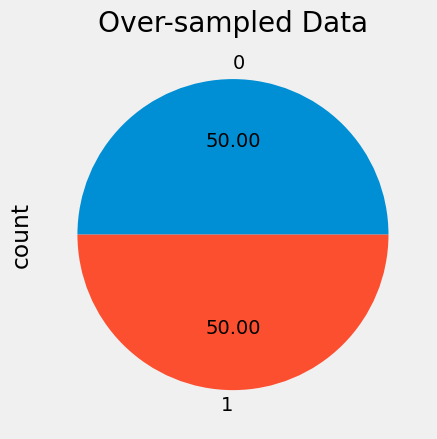

In [16]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
rus = RandomOverSampler(sampling_strategy='auto')
x_res, y_res = rus.fit_resample(x, y)
y_res = pd.Series(y_res, name='target')
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title('Over-sampled Data')
Balanced_df = pd.concat([pd.DataFrame(x_res), y_res], axis=1)


In [17]:
Balanced_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,target
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566501,167338.0,-1.374424,2.793185,-4.346572,2.400731,-1.688433,0.111136,-0.922038,-2.149930,-2.027474,...,-0.870779,0.504849,0.137994,0.368275,0.103137,-0.414209,0.454982,0.096711,349.08,1
566502,26863.0,-21.209120,12.652197,-23.553933,6.174078,-16.026658,-4.422195,-16.229444,14.116002,-3.922741,...,1.758440,-1.522588,-0.903860,0.130166,1.454857,-0.223214,1.550928,0.461460,99.99,1
566503,8169.0,0.857321,4.093912,-7.423894,7.380245,0.973366,-2.730762,-1.496497,0.543015,-2.351190,...,0.375026,0.145400,0.240603,-0.234649,-1.004881,0.435832,0.618324,0.148469,1.00,1
566504,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1


In [18]:
print(Balanced_df.describe())

                Time             V1             V2             V3  \
count  566506.000000  566506.000000  566506.000000  566506.000000   
mean    87603.355770      -2.255159       1.699418      -3.369698   
std     48572.687321       5.362097       3.579107       6.031344   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     45239.000000      -2.783865      -0.158113      -4.986159   
50%     79411.000000      -0.758469       0.944321      -1.334635   
75%    134928.000000       1.044306       2.720472       0.346379   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  566506.000000  566506.000000  566506.000000  566506.000000   
mean        2.235759      -1.482835      -0.718396      -2.593757   
std         3.184343       4.137894       1.695852       5.576668   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%        -0.112938      -1.6983

In [19]:
Balanced_df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [20]:
Balanced_df.duplicated().sum()

282780

In [21]:
Balanced_df.drop_duplicates(inplace=True)

In [22]:
Balanced_df.dropna(inplace=True)

In [23]:
Balanced_df.duplicated().sum()

0

In [24]:
x.dropna(inplace=True)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [26]:
categorical_cols = Balanced_df.select_dtypes(include='object').columns
print(f"Categorical columns: {categorical_cols}")
if len(categorical_cols) > 0:
    data = pd.get_dummies(Balanced_df, columns=categorical_cols, drop_first=True)

Categorical columns: Index([], dtype='object')


In [27]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [28]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(226980, 30) (226980,) (56746, 30) (56746,)


In [29]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)

    return accuracy, precision, recall, f1, confusion, report


In [34]:
Logistic_model = LogisticRegression(max_iter = 1500)
Logistic_model.fit(x_train, y_train)
y_pred_Logistic = Logistic_model.predict(x_test)

In [35]:
Logistic_metrics = evaluate_model(y_test, y_pred_Logistic)
print("Logistic Model Evaluation:")
print("Accuracy:", Logistic_metrics[0])
print("Precision:", Logistic_metrics[1])
print("Recall:", Logistic_metrics[2])
print("F1-Score:", Logistic_metrics[3])
print("Confusion Matrix:\n", Logistic_metrics[4])
print("Classification Report:\n", Logistic_metrics[5])

Logistic Model Evaluation:
Accuracy: 0.9991893701758714
Precision: 0.8928571428571429
Recall: 0.5555555555555556
F1-Score: 0.684931506849315
Confusion Matrix:
 [[56650     6]
 [   40    50]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.89      0.56      0.68        90

    accuracy                           1.00     56746
   macro avg       0.95      0.78      0.84     56746
weighted avg       1.00      1.00      1.00     56746



In [37]:
SGD_model = SGDClassifier(max_iter=1000, tol=1e-3)
SGD_model.fit(x_train, y_train)
y_pred_SGD = SGD_model.predict(x_test)
SGD_metrics = evaluate_model(y_test, y_pred_SGD)
print("KNN Model Evaluation:")
print("Accuracy:", SGD_metrics[0])
print("Precision:", SGD_metrics[1])
print("Recall:", SGD_metrics[2])
print("F1-Score:", SGD_metrics[3])
print("Confusion Matrix:\n", SGD_metrics[4])
print("Classification Report:\n", SGD_metrics[5])

KNN Model Evaluation:
Accuracy: 0.9991012582384662
Precision: 0.8823529411764706
Recall: 0.5
F1-Score: 0.6382978723404256
Confusion Matrix:
 [[56650     6]
 [   45    45]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.88      0.50      0.64        90

    accuracy                           1.00     56746
   macro avg       0.94      0.75      0.82     56746
weighted avg       1.00      1.00      1.00     56746



In [38]:
K_values = range(1, 16)
acc_values = []

for k in K_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  y_pred_knn = knn.predict(x_test)
  acc_values.append(accuracy_score(y_test, y_pred_knn))
  print(f"K={k}, Accuracy={accuracy_score(y_test, y_pred_knn)}")

K=1, Accuracy=0.9994713283755683
K=2, Accuracy=0.9995241955380115
K=3, Accuracy=0.9995946850879357
K=4, Accuracy=0.9994889507630493
K=5, Accuracy=0.9994889507630493
K=6, Accuracy=0.9994537059880872
K=7, Accuracy=0.9994537059880872
K=8, Accuracy=0.9994537059880872
K=9, Accuracy=0.9994537059880872
K=10, Accuracy=0.9994184612131252
K=11, Accuracy=0.9994537059880872
K=12, Accuracy=0.9994184612131252
K=13, Accuracy=0.9994360836006062
K=14, Accuracy=0.9994008388256441
K=15, Accuracy=0.9994008388256441


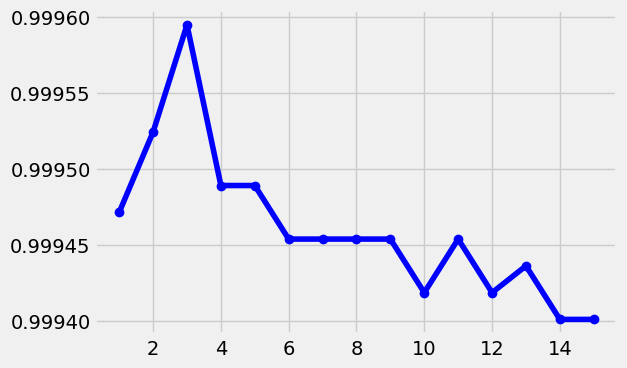

In [40]:
fig= plt.figure(figsize=(6,4))
plt.plot(K_values, acc_values, marker = 'o', linestyle='-', color='Blue')

In [39]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [41]:
knn_metrics = evaluate_model(y_test, y_pred_knn)
print("KNN Model Evaluation:")
print("Accuracy:", knn_metrics[0])
print("Precision:", knn_metrics[1])
print("Recall:", knn_metrics[2])
print("F1-Score:", knn_metrics[3])
print("Confusion Matrix:\n", knn_metrics[4])
print("Classification Report:\n", knn_metrics[5])

KNN Model Evaluation:
Accuracy: 0.9995946850879357
Precision: 0.971830985915493
Recall: 0.7666666666666667
F1-Score: 0.8571428571428571
Confusion Matrix:
 [[56654     2]
 [   21    69]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.77      0.86        90

    accuracy                           1.00     56746
   macro avg       0.99      0.88      0.93     56746
weighted avg       1.00      1.00      1.00     56746



svc

In [77]:
svc_linear = SVC(kernel="linear")
svc_linear.fit(x_train, y_train)
y_pred_linear = svc_linear.predict(x_test)

In [78]:
svc_linear_metrics = evaluate_model(y_test, y_pred_linear)
print("SVC linear Model Evaluation:")
print("Accuracy:", svc_linear_metrics[0])
print("Precision:", svc_linear_metrics[1])
print("Recall:", svc_linear_metrics[2])
print("F1-Score:", svc_linear_metrics[3])
print("Confusion Matrix:\n", svc_linear_metrics[4])
print("Classification Report:\n", svc_linear_metrics[5])

SVC linear Model Evaluation:
Accuracy: 0.9994008388256441
Precision: 0.8589743589743589
Recall: 0.7444444444444445
F1-Score: 0.7976190476190477
Confusion Matrix:
 [[56645    11]
 [   23    67]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.86      0.74      0.80        90

    accuracy                           1.00     56746
   macro avg       0.93      0.87      0.90     56746
weighted avg       1.00      1.00      1.00     56746



In [79]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(x_train, y_train)
y_pred_rbf = svc_rbf.predict(x_test)

In [80]:
svc_rbf_metrics = evaluate_model(y_test, y_pred_rbf)
print("SVC RBF Model Evaluation:")
print("Accuracy:", svc_rbf_metrics[0])
print("Precision:", svc_rbf_metrics[1])
print("Recall:", svc_rbf_metrics[2])
print("F1-Score:", svc_rbf_metrics[3])
print("Confusion Matrix:\n", svc_rbf_metrics[4])
print("Classification Report:\n", svc_rbf_metrics[5])

SVC RBF Model Evaluation:
Accuracy: 0.9994184612131252
Precision: 0.9830508474576272
Recall: 0.6444444444444445
F1-Score: 0.7785234899328859
Confusion Matrix:
 [[56655     1]
 [   32    58]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.98      0.64      0.78        90

    accuracy                           1.00     56746
   macro avg       0.99      0.82      0.89     56746
weighted avg       1.00      1.00      1.00     56746



In [81]:
svc_poly = SVC(kernel='poly')
svc_poly.fit(x_train, y_train)
y_pred_poly = svc_poly.predict(x_test)

In [82]:
svc_poly_metrics = evaluate_model(y_test, y_pred_poly)
print("SVC Poly Model Evaluation:")
print("Accuracy:", svc_poly_metrics[0])
print("Precision:", svc_poly_metrics[1])
print("Recall:", svc_poly_metrics[2])
print("F1-Score:", svc_poly_metrics[3])
print("Confusion Matrix:\n", svc_poly_metrics[4])
print("Classification Report:\n", svc_poly_metrics[5])

SVC Poly Model Evaluation:
Accuracy: 0.9993303492757198
Precision: 0.90625
Recall: 0.6444444444444445
F1-Score: 0.7532467532467533
Confusion Matrix:
 [[56650     6]
 [   32    58]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.91      0.64      0.75        90

    accuracy                           1.00     56746
   macro avg       0.95      0.82      0.88     56746
weighted avg       1.00      1.00      1.00     56746



Neural Network



In [70]:
NN_model = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32, 16, 8),
    activation='relu',
    solver='sgd',
    max_iter=1000,
    random_state=42
)

In [71]:
NN_model.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(128, 64, 32, 16, 8), max_iter=1000,
              random_state=42, solver='sgd')

In [72]:
y_pred_NN = NN_model.predict(x_test)

In [73]:
NN_model_metrics = evaluate_model(y_test, y_pred_NN)
print("KNN Model Evaluation:")
print("Accuracy:", NN_model_metrics[0])
print("Precision:", NN_model_metrics[1])
print("Recall:", NN_model_metrics[2])
print("F1-Score:", NN_model_metrics[3])
print("Confusion Matrix:\n", NN_model_metrics[4])
print("Classification Report:\n", NN_model_metrics[5])

KNN Model Evaluation:
Accuracy: 0.9994184612131252
Precision: 0.8607594936708861
Recall: 0.7555555555555555
F1-Score: 0.8047337278106509
Confusion Matrix:
 [[56645    11]
 [   22    68]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.86      0.76      0.80        90

    accuracy                           1.00     56746
   macro avg       0.93      0.88      0.90     56746
weighted avg       1.00      1.00      1.00     56746



In [109]:
models = [("Logistick", Logistic_model), ("SGD Classifier", SGD_model),("KNN", knn), ("NN model", NN_model), ("SVM Linear", svc_linear), ("SVM Poly", svc_poly), ("SVM RBF", svc_rbf), ("Elastic", elastic_net)]
model_names = []
accuracy_values = []

for name, model in models:
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    model_names.append(name)
    accuracy_values.append(acc)

Logistick Accuracy: 0.9992
SGD Classifier Accuracy: 0.9991
KNN Accuracy: 0.9996
NN model Accuracy: 0.9994
SVM Linear Accuracy: 0.9994
SVM Poly Accuracy: 0.9993
SVM RBF Accuracy: 0.9994
Elastic Accuracy: 0.9991


<ipython-input-84-b8f6f2809bc3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')


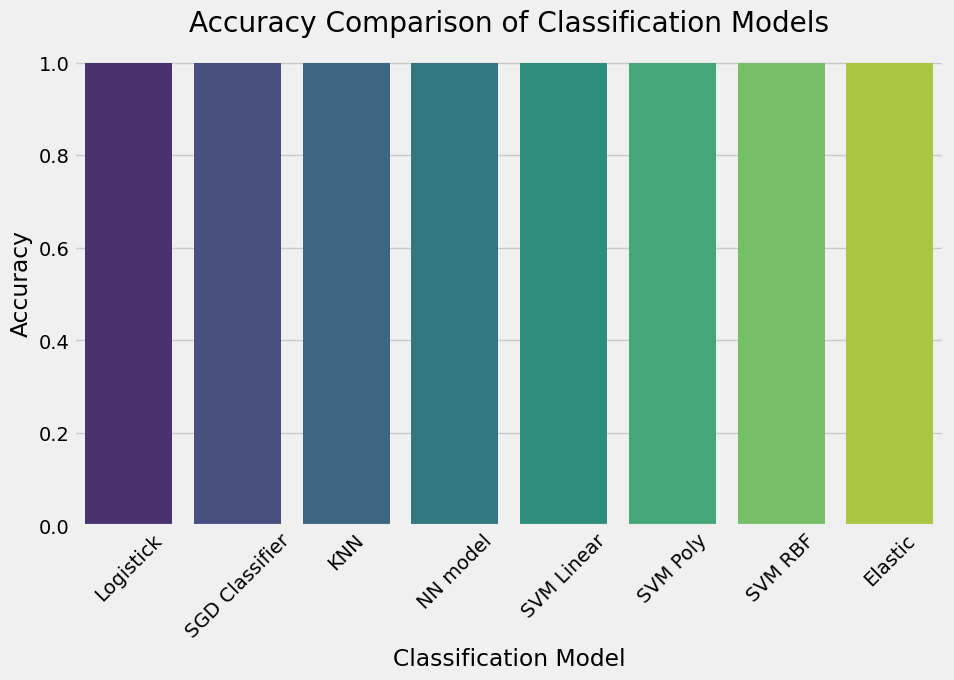

In [84]:
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_values
})

# Plot the results using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Accuracy Comparison of Classification Models')
plt.xlabel('Classification Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

In [85]:
from sklearn.ensemble import VotingClassifier

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators= models, voting='hard')

# Train and evaluate the voting classifier
voting_clf.fit(x_train, y_train)
y_pred_voting = voting_clf.predict(x_test)
acc_voting = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {acc_voting:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Voting Classifier Accuracy: 0.9994


In [86]:
# Using Random Forest Classifier for Bagging
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(x_train, y_train)
y_pred_rf = rf_clf.predict(x_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {acc_rf:.4f}")

Random Forest Classifier Accuracy: 0.9995


In [ ]:
# Meta-model (Final estimator)
meta_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the Stacking Classifier
stacking_classifier = StackingClassifier(estimators=models , final_estimator=meta_classifier)

# Train the stacking classifier
stacking_classifier.fit(x_train, y_train)

# Evaluate the stacking classifier
y_pred_stacking_clf = stacking_classifier.predict(x_test)
acc_stacking = accuracy_score(y_test, y_pred_stacking_clf)

print(f"Stacking Classifier Accuracy: {acc_stacking:.4f}")

In [105]:
data = pd.read_csv("/content/Classification_Test_file.csv")

In [106]:
y_test_pred = svc_rbf.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [107]:
submission = pd.DataFrame({
    "ID" : range(0, len(data)),
    'Class' : y_test_pred
})

In [108]:
submission.to_csv("Submission.csv", index=False)
print("Submission file created successfuly")

Submission file created successfuly
